In [1]:
import sklearn
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
!pip install mglearn
import mglearn
from sklearn.decomposition import PCA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.5 MB/s eta 0:00:00a 0:00:01


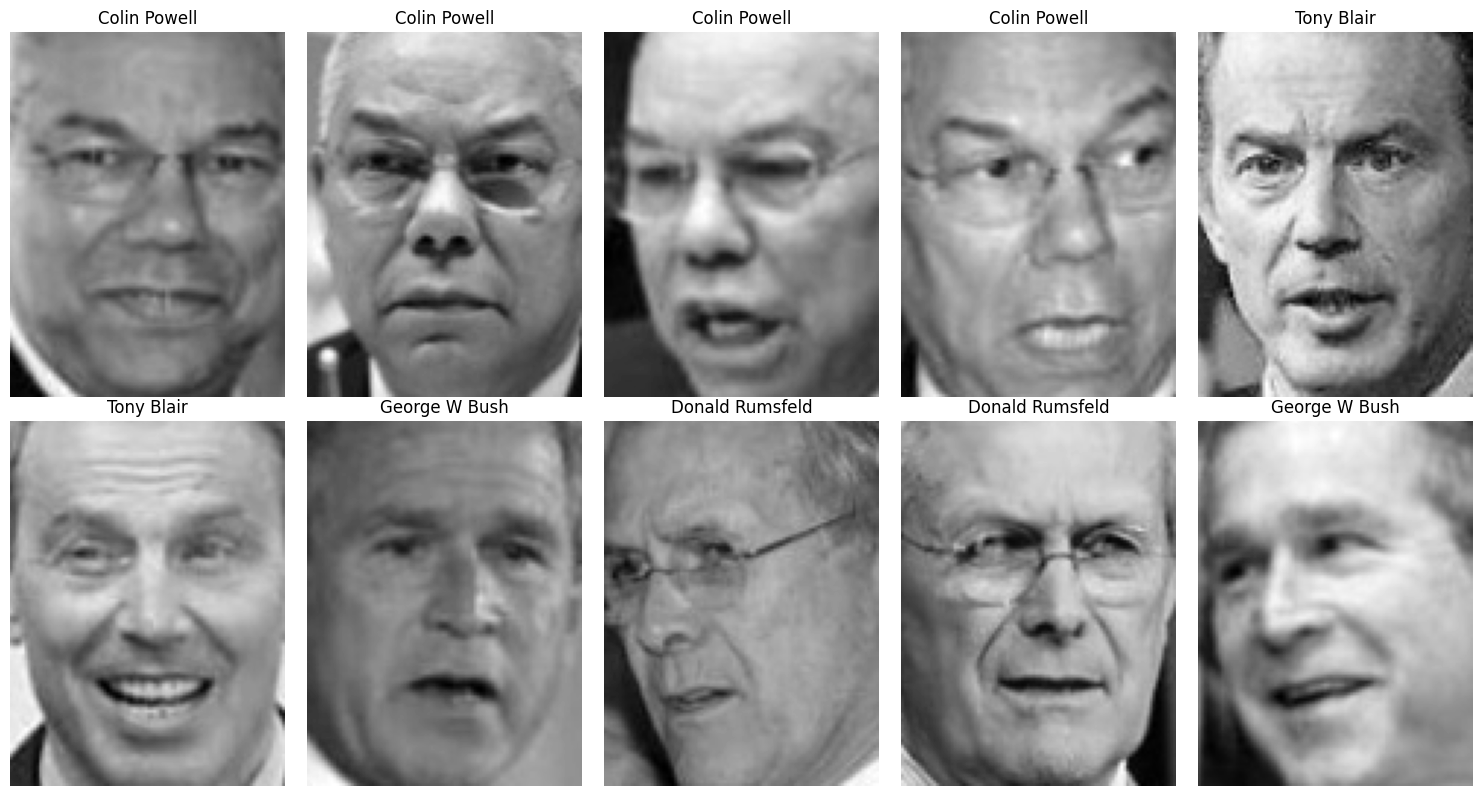

In [2]:
# Q1: Importer la base de données "fetch_lfw_people" du package sklearn, et afficher les dix premières images.


# Load the dataset
faces = fetch_lfw_people(min_faces_per_person=110, resize=1)

# Create a figure with subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()  # Flatten the 2D array of axes

# Plot the first 10 images
for i in range(10):
    # Get the image and reshape it
    image = faces.images[i]
    
    # Display the image
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')  # Hide axes
    # Add title with the person's name
    axes[i].set_title(faces.target_names[faces.target[i]])

plt.tight_layout()
plt.show()

In [3]:
# Q2 : Afficher la description de la base de données : forme de tableau d'images de visage, le nombre de classes.

# Display basic information about the dataset
print("Dataset Description:")
print("-" * 50)
print(f"Number of samples: {faces.data.shape[0]}")
print(f"Number of features: {faces.data.shape[1]}")
print(f"Number of classes (unique people): {len(faces.target_names)}")
print("\nTarget names (people):", faces.target_names)
print("\nImage shape:", faces.images[0].shape)
print(f"Total number of images: {len(faces.images)}")

# Display the distribution of images per person
unique, counts = np.unique(faces.target, return_counts=True)

# # If you want to see the DESCR attribute
# print("\nDataset Description Text:")
# print("-" * 50)
# print(faces.DESCR)


Dataset Description:
--------------------------------------------------
Number of samples: 1031
Number of features: 11750
Number of classes (unique people): 4

Target names (people): ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Tony Blair']

Image shape: (125, 94)
Total number of images: 1031


In [4]:
# Q3 : Calculer la fréquence d'occurrence de chaque réponse et imprimer la fréquence à côté des réponses


# Count images per person
unique, counts = np.unique(faces.target, return_counts=True)

# Display class names with their corresponding counts
print("Person name: Number of images")
print("-" * 50)
for name, count in zip(faces.target_names, counts):
    print(f"{name}: {count}")


Person name: Number of images
--------------------------------------------------
Colin Powell: 236
Donald Rumsfeld: 121
George W Bush: 530
Tony Blair: 144


In [5]:
# Q4 : Pour plus de stabilité, redimensionnons l'échelle de gris pour que les valeurs étaient 
#comprises entre 0 et 1 au lieu d'utiliser l'échelle de valeurs de 0 à 255

images = faces.images
scaled_images = images / 1
print("valeur min est :", np.min(scaled_images))
print("valeur max est :", np.max(scaled_images))

valeur min est : 0.0
valeur max est : 1.0


In [6]:
# Q5: A l'aide de KNeighborsClassifier créer un modèle pour classifier les images, et voyons à quel point le fonctionne.

x = faces.data
y = faces.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.69


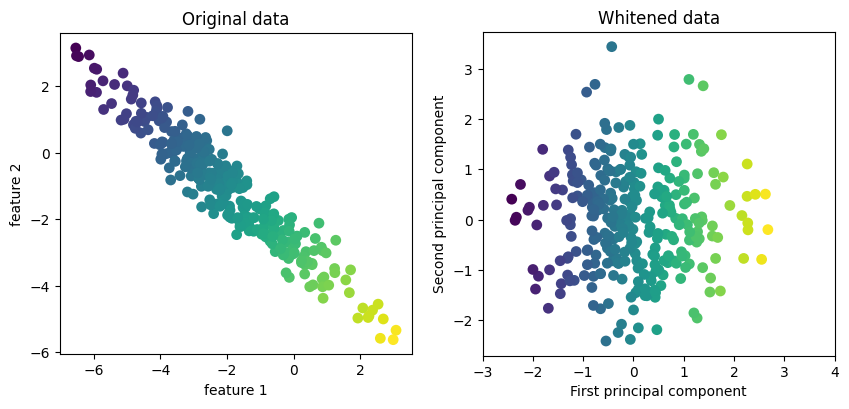

In [7]:
# Q6 : Utiliser l'option de blanchiment de PSA, qui convertit les composants à la même échelle : mglearn.plots.plot_pca_whitening().

# Basic visualization of PCA whitening
mglearn.plots.plot_pca_whitening()
plt.show()

# Now let's apply PCA whitening to our face dataset
def apply_pca_whitening(X, n_components=None):
    # Initialize PCA with whitening
    pca = PCA(n_components=n_components, whiten=True)
    
    # Fit and transform the data
    X_whitened = pca.fit_transform(X)
    
    # Plot original vs whitened data
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot first two dimensions of original data
    ax1.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.5)
    ax1.set_title('Original Data')
    ax1.set_xlabel('First feature')
    ax1.set_ylabel('Second feature')
    
    # Plot first two dimensions of whitened data
    ax2.scatter(X_whitened[:, 0], X_whitened[:, 1], c='red', alpha=0.5)
    ax2.set_title('Whitened Data')
    ax2.set_xlabel('First principal component')
    ax2.set_ylabel('Second principal component')
    
    plt.tight_layout()
    plt.show()
    
    return X_whitened, pca

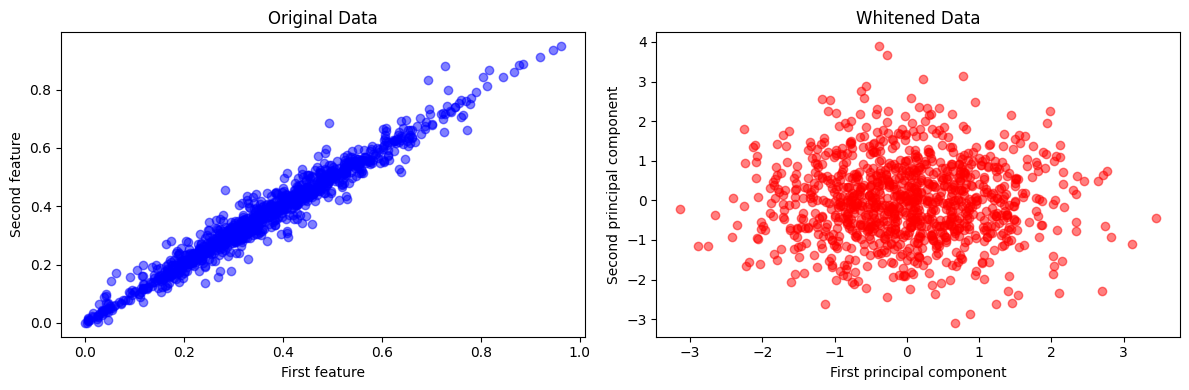

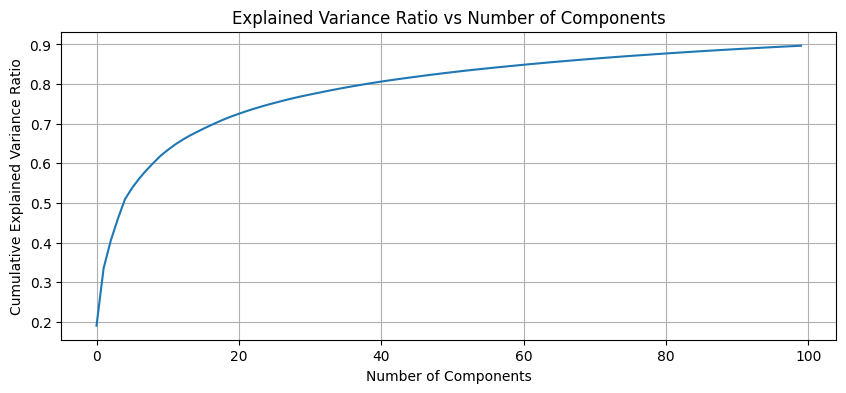

In [8]:
# Q7 : Appliquer l'objet PCA sur les données d'apprentissage et extrayez les 100 premiers composants principaux.
#Ensuite, transformez les données d'entraînement et de test.

X = faces.data

# Apply PCA whitening
X_whitened, pca = apply_pca_whitening(X, n_components=100)

# Display explained variance ratio
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

# Visualize some original and whitened faces
def plot_original_and_whitened_faces(X, X_whitened, pca, n_faces=5):
    # Reconstruct the whitened faces
    X_reconstructed = pca.inverse_transform(X_whitened)
    
    fig, axes = plt.subplots(3, n_faces, figsize=(2*n_faces, 6))
    
    for i in range(n_faces):
        # Original face
        axes[0, i].imshow(X[i].reshape(faces.images[0].shape), cmap='gray')
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_title('Original')
            
        # Whitened face (reshaped back to image dimensions)
        axes[1, i].imshow(X_whitened[i].reshape(-1, 1), cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_title('Whitened')
            
        # Reconstructed face
        axes[2, i].imshow(X_reconstructed[i].reshape(faces.images[0].shape), cmap='gray')
        axes[2, i].axis('off')
        if i == 0:
            axes[2, i].set_title('Reconstructed')
    
    plt.tight_layout()
    plt.show()

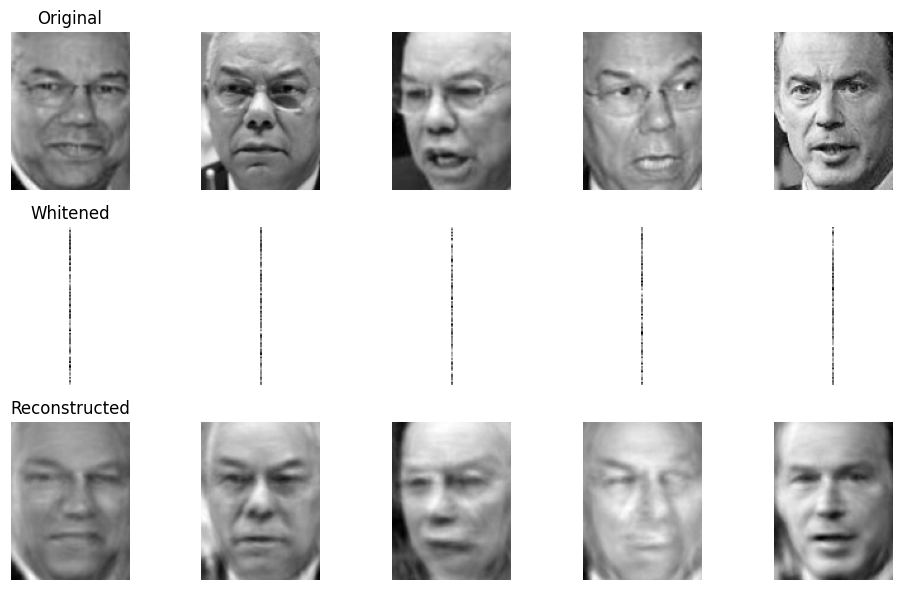


PCA Whitening Statistics:
--------------------------------------------------
Original data shape: (1031, 11750)
Whitened data shape: (1031, 100)
Number of components explaining 95% variance: 100
Total variance explained: 0.897


In [9]:

# Plot the faces
plot_original_and_whitened_faces(X, X_whitened, pca)

# Print some statistics
print("\nPCA Whitening Statistics:")
print("-" * 50)
print(f"Original data shape: {X.shape}")
print(f"Whitened data shape: {X_whitened.shape}")
print(f"Number of components explaining 95% variance: {np.sum(np.cumsum(pca.explained_variance_ratio_) <= 0.95)}")
print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_):.3f}")


In [16]:
# Q8 : utiliser le nouvel ensemble d'apprentissage pour classer les images en utilisant le classificateur Knn, dont k=1.
x_train, x_test, y_train, y_test = train_test_split(X_whitened, y, test_size=0.2, random_state=0) 

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.73


Shape of pca.components_: (100, 11750)


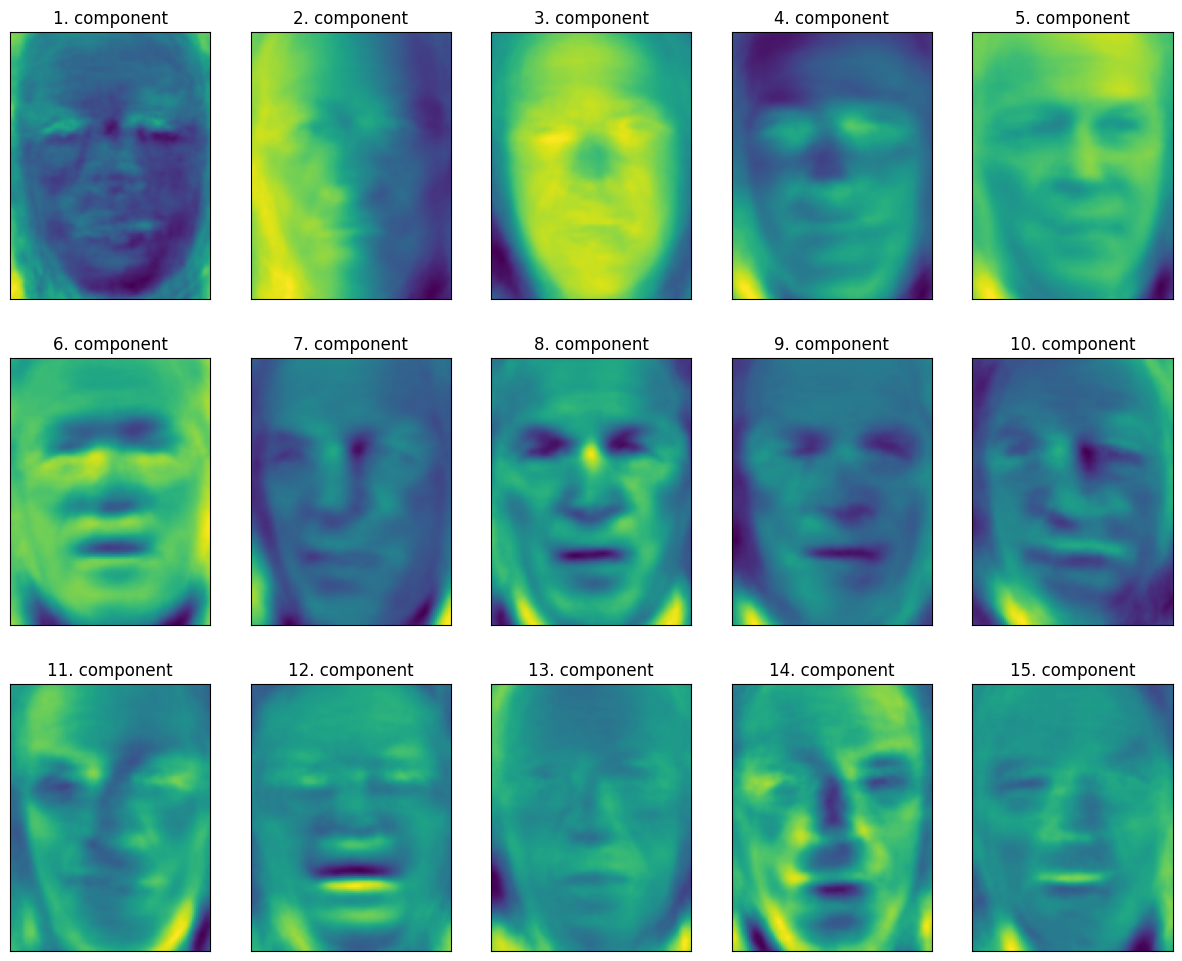

In [11]:
# Q 10 : Afficher les premiers composants principaux à l’aide de code ci-dessous et donner vos remarques sur ces composantes.

# Supposons que les images originales ont une forme (64, 64) par exemple
print("Shape of pca.components_: {}".format(pca.components_.shape))

image_shape = (125, 94)  # Remplacez par les dimensions correctes

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title(f"{i + 1}. component")


ValueError: n_components=2000 must be between 0 and min(n_samples, n_features)=1031 with svd_solver='full'

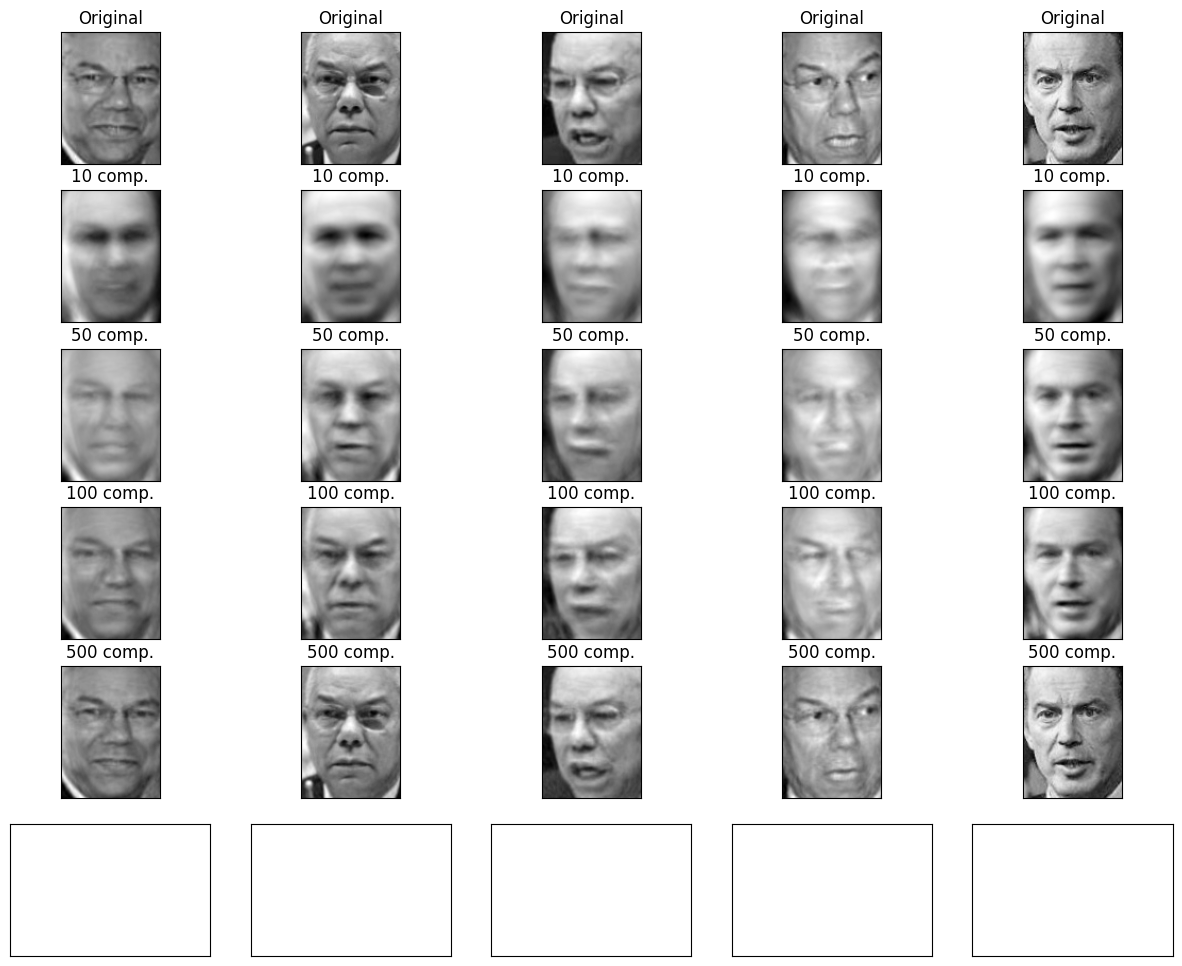

In [32]:
# Q 11: 

# Données originales (faces.data doit être une matrice 2D : n_samples x n_features)
n_components_list = [10, 50, 100, 500, 2000]
n_samples = 5  # Nombre d'images à reconstruire pour visualisation

# Original faces data
X = faces.data
X_sample = X[:n_samples]  # Prenons quelques images pour reconstruction

# Définir la forme des images
image_shape = (125, 94)

# Assurez-vous que les données sont redimensionnées correctement pour l'affichage
fig, axes = plt.subplots(len(n_components_list) + 1, n_samples, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

# Ligne 0 : Images originales
for i, ax in enumerate(axes[0]):
    ax.imshow(X_sample[i].reshape(image_shape), cmap='gray')  # Redimensionnement
    ax.set_title("Original")

# Reconstructions pour différents nombres de composants
for row, n_components in enumerate(n_components_list, start=1):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)  # Réduction
    X_reconstructed = pca.inverse_transform(X_pca)  # Reconstruction

    for i, ax in enumerate(axes[row]):
        ax.imshow(X_reconstructed[i].reshape(image_shape), cmap='gray')  # Redimensionnement
        ax.set_title(f"{n_components} comp.")

plt.tight_layout()
plt.show()
